In [2]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [12]:
df_joined = pd.read_csv('data/df_joined_1.csv')

In [13]:
df_joined

,EmployeeNumber,Age,Openness,Conscieniousness,Extroversion,Agreeableness,Emotional Balance,DailyRate,DistanceFromHome,Education,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_Yes
0,1,41,25,23,14,22,1,1102,1,2,...,0,0,0,1,0,0,0,1,1,1
1,2,49,8,18,-8,11,-19,279,8,1,...,0,0,1,0,0,0,1,0,1,0
2,4,37,27,25,5,14,-34,1373,2,2,...,0,0,0,0,0,0,0,1,1,1
3,5,33,23,2,-8,13,-31,1392,3,4,...,0,0,1,0,0,0,1,0,1,1
4,7,27,16,10,4,20,-18,591,2,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,14,1,20,18,-12,884,23,2,...,0,0,0,0,0,0,1,0,1,0
1466,2062,39,12,-3,-12,12,-38,613,6,1,...,0,0,0,0,0,0,1,0,1,0
1467,2064,27,26,15,15,18,2,155,4,3,...,1,0,0,0,0,0,1,0,1,1
1468,2065,49,24,-2,3,15,-18,1023,2,3,...,0,0,0,1,0,0,1,0,1,0


### Preliminary Modeling
Since the data set was fabricated, it is hard to develop an intuition regarding the "rightness" of results.  Accodringly, I'll use an unsupervis3d model at the outset to see whether any ounderlying patterns come through once we reduce dimentions. 

In [3]:
# # # First set of features:
# dependent_var = 'Attrition_Yes'
# independent_var_one = ['JobSatisfaction', 'PerformanceRating', 'JobInvolvement']

# predictors = '+'.join(independent_var_one)
# formula = dependent_var + '~' + predictors
# model = ols(formula=formula, data=df_joined).fit()
# model.summary()

In [14]:
df_joined.columns

Index(['EmployeeNumber', 'Age', 'Openness', 'Conscieniousness', 'Extroversion',
       'Agreeableness', 'Emotional Balance', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',


### Normalizing for subsequent modeling

In [17]:
# I removed dummies from feature list to use for normalization
dummies = ['Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Over18_Y', 'OverTime_Yes']
features = ['Age', 'Openness', 'Conscieniousness', 'Extroversion',
       'Agreeableness', 'Emotional Balance', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [18]:
# preprocess the data 
from sklearn.preprocessing import StandardScaler

In [19]:
# Separating out the features
x = df_joined.loc[:, features].values
# Separating out the target
y = df_joined.loc[:,['Attrition_Yes']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [25]:
print(x.shape)
print(y.shape)

(1470, 30)
(1470, 1)


In [28]:
x

array([[ 0.4463504 ,  0.62838029,  1.81536823, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -1.99889485,  1.13592243, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.93747149,  2.08714654, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.78292589,  0.72825496, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521,  0.4738347 , -1.58186073, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.3192891 ,  0.18469833, ..., -0.33939374,
        -0.36871529, -0.59522723]])

### Principle Component Analysis (PCA):
Reduce dimensions for ease of visualization and therefor understanding of data

In [27]:
from sklearn.decomposition import PCA


In [30]:
# create principal components 
pca = PCA(n_components= 5)
principalComponents = pca.fit_transform(x)

In [33]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4', 
                                                                  'principal component 5']
pca.explained_variance_ratio_

SyntaxError: invalid syntax (<ipython-input-33-928052a00880>, line 4)

In [ ]:
# pca.explained_variance_

In [ ]:
# principalDf.iloc[:,:3].head()

In [ ]:
# eig_values = pca.explained_variance_
# eig_vectors = pca.components_
# print(eig_values)
# print(eig_vectors)

### T- Distributed Stochastic Neighbor Embedding (TSNE):
Reduce dimensions while  for ease of visualization and therefor understanding of data

### Clustering Models
### K- Means Clustering

In [34]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=5).fit(x)
kmeans.labels_

kmeans.predict(x)

first_k_cluster = kmeans.cluster_centers_

In [41]:
y_kmeans = kmeans.predict(x)

In [37]:
first_k_cluster

array([[-7.66435133e-02, -9.17560543e-02,  3.01497603e-02,
        -2.08845002e-02, -4.81203754e-02,  2.16351416e-02,
        -3.58819654e-02,  9.76354197e-03,  1.40446304e-01,
         0.00000000e+00,  9.07164597e-02, -9.73168898e-02,
         4.39494148e-02,  9.65266714e-03,  1.33447087e-02,
        -9.07182253e-02, -4.93578253e-02, -3.27800652e-01,
        -3.62408613e-01, -4.26230015e-01, -6.79460932e-02,
         0.00000000e+00,  7.72774851e-02,  8.14901031e-02,
         6.76949634e-02, -2.54035770e-02,  5.34811071e-01,
         8.68019203e-01,  4.34697112e-01,  9.30399249e-01],
       [-2.26969491e-01,  6.52753270e-02,  3.80584052e-04,
         5.34919705e-02,  1.18642488e-01,  5.33147874e-02,
         2.96286625e-03,  8.06045271e-02, -1.12376413e-01,
         0.00000000e+00, -7.15209533e-02, -3.28150273e-03,
        -3.16105178e-02, -3.70236615e-01, -4.68690199e-03,
        -3.87622186e-01, -5.84668528e-02, -1.00797705e-01,
         1.78038472e+00,  2.34615106e+00, -1.22550547e-

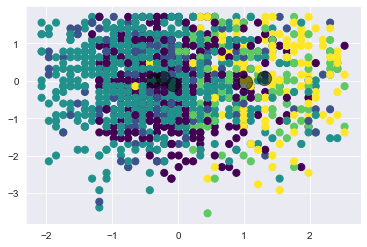

In [42]:
# first_k_cluster = kmeans.cluster_centers_
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(first_k_cluster[:, 0], first_k_cluster[:, 1], c='black', s=200, alpha=0.5);

In [43]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
print(calinski_harabasz_score(x, cluster_assignments))